C:\Users\srust\AppData\Local\Temp\ipykernel_14372\2116629796.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pm25 = df["PM2.5"].fillna(method="ffill").fillna(method="bfill")
C:\Users\srust\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - loss: 0.0307 - val_loss: 0.0140
Epoch 2/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 0.0166 - val_loss: 0.0062
Epoch 3/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - loss: 0.0094 - val_loss: 0.0033
Epoch 4/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - loss: 0.0069 - val_loss: 0.0028
Epoch 5/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 0.0061 - val_loss: 0.0025
Epoch 6/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - loss: 0.0056 - val_loss: 0.0022
Epoch 7/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - loss: 0.0050 - val_loss: 0.0018
Epoch 8/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 0.0045 - val_loss: 0.0016
Epoch 9/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - loss: 0.0043 - val_loss: 0.0014
Epoch 10/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - loss: 0.0039 - val_loss: 0.0014
Epoch 11/50
904/904 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - loss: 0.0038 - val_loss: 0.0013
Epoch 12/50
904/904 ━━━━━━━━━━

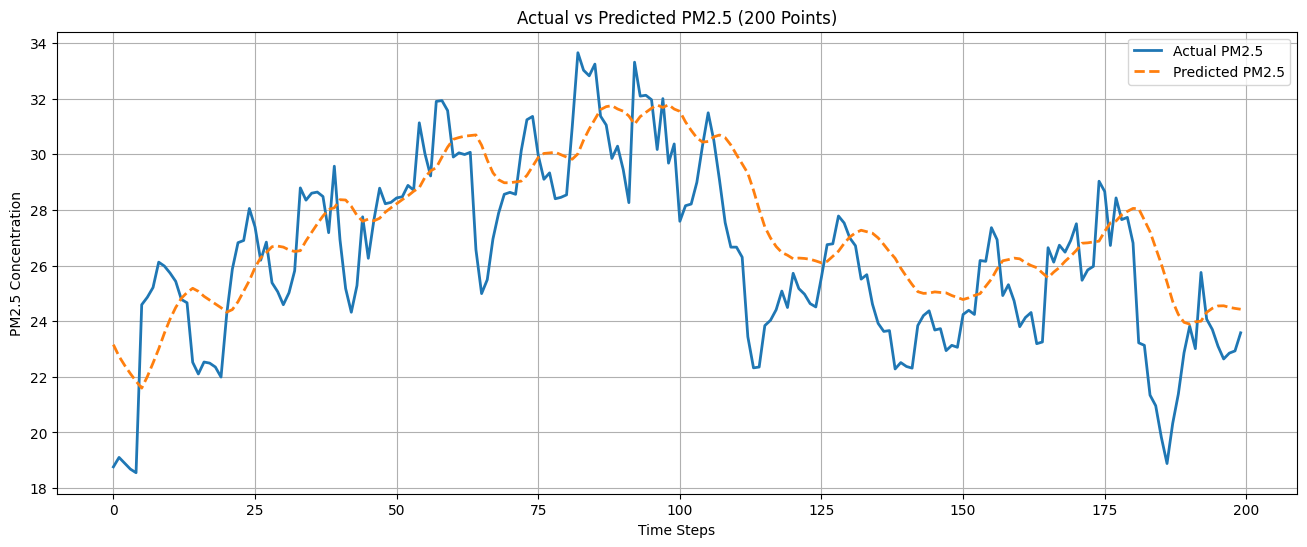

In [5]:


import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam



df = pd.read_csv(r'C:\Users\srust\Downloads\air-quality-india.csv')
df = df.sort_values(by=df.columns[0])

pm25 = df["PM2.5"].fillna(method="ffill").fillna(method="bfill")
pm25 = pm25.values.reshape(-1, 1).astype("float32")


scaler = MinMaxScaler()
pm25_scaled = scaler.fit_transform(pm25)


WINDOW = 37

def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X, y = create_sequences(pm25_scaled, WINDOW)


X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


model = Sequential([
    LSTM(9, input_shape=(WINDOW, 1)),
    Dropout(0.2),
    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss="mse"
)


model.fit(
    X_train,
    y_train,
    epochs=50,         
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)



y_pred = scaler.inverse_transform(y_pred_scaled)
y_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


POINTS = 200
y_pred_200 = y_pred[:POINTS]
y_actual_200 = y_actual[:POINTS]


plt.figure(figsize=(16,6))
plt.plot(y_actual_200, label="Actual PM2.5", linewidth=2)
plt.plot(y_pred_200, label="Predicted PM2.5", linestyle="--", linewidth=2)
plt.title("Actual vs Predicted PM2.5 (200 Points)")
plt.xlabel("Time Steps")
plt.ylabel("PM2.5 Concentration")
plt.legend()
plt.grid(True)
plt.show()


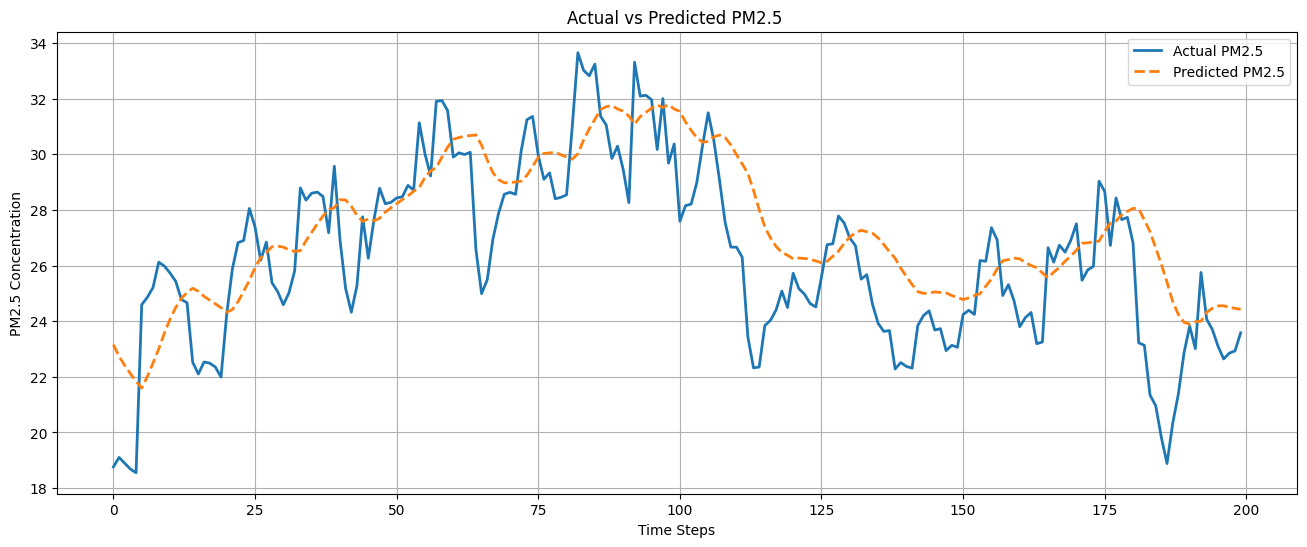

In [7]:
plt.figure(figsize=(16,6))
plt.plot(y_actual_200, label="Actual PM2.5", linewidth=2)
plt.plot(y_pred_200, label="Predicted PM2.5", linestyle="--", linewidth=2)
plt.title("Actual vs Predicted PM2.5 ")
plt.xlabel("Time Steps")
plt.ylabel("PM2.5 Concentration")
plt.legend()
plt.grid(True)


plt.savefig("pm25_actual_vs_predicted_200points.png", dpi=300, bbox_inches="tight")

plt.show()
